# Actividad 5 – Cambio de variable en la recurrencia
En esta actividad vamos a aplicar de forma detallada una técnica clásica para resolver ciertas ecuaciones de recurrencia: el **cambio de variable**.

La recurrencia que estudiaremos es:

$$
T(n) = T(n/2) + \log n, \quad T(1) = 0.
$$

El objetivo es:

- Transformar la recurrencia mediante el cambio de variable $n = 2^k$.

- Resolver la nueva recurrencia en términos de $k$.

- Reconvertir el resultado a una expresión en función de $n$.

- Identificar el orden de complejidad asintótica de $T(n)$.


---

## 0. Recordatorio teórico
Cuando en una recurrencia aparece un término como $T(n/2)$, es habitual considerar el cambio de variable:

$$
n = 2^k \quad \Longleftrightarrow \quad k = \log_2 n.
$$

Este cambio permite convertir la relación en términos de $n$ (con divisiones por 2) en una relación en términos de $k$ (con restas de 1), que suele ser más fácil de tratar.

En esta actividad aplicaremos este procedimiento paso a paso.


## 1. Planteamiento de la recurrencia

Partimos de la recurrencia:

$$
T(n) = T(n/2) + \log n, \quad T(1) = 0.
$$

Esta forma aparece, por ejemplo, en algoritmos donde:

- En cada paso se reduce el tamaño del problema a la mitad.

- Se realiza, además, un trabajo adicional proporcional a $\log n$.


Resolveremos esta recurrencia suponiendo que $n$ es una potencia de 2, es decir, $n = 2^k$ para algún entero $k \geq 0$. Esta suposición simplifica la notación y no altera el orden de complejidad asintótica del resultado.


## 2. Cambio de variable $n = 2^k$

Aplicamos el cambio de variable:

$$
n = 2^k, \quad k = \log_2 n.
$$

Definimos una nueva función:

$$
S(k) = T(2^k).
$$

Con esta definición, podemos reescribir la recurrencia original en términos de $S(k)$.

Partimos de:

$$
T(n) = T(n/2) + \log n.
$$

Sustituimos $n = 2^k$:

$$
T(2^k) = T(2^{k-1}) + \log(2^k).
$$

Usando la definición de $S(k)$:

$$
S(k) = S(k-1) + \log(2^k).
$$

Si usamos logaritmo en base 2, $\log_2(2^k) = k$. Por tanto, en base 2 la recurrencia se convierte en:

$$
S(k) = S(k-1) + k.
$$

La condición inicial $T(1) = 0$ corresponde a $n = 1 = 2^0$, es decir, $k = 0$, así que:

$$
S(0) = T(2^0) = T(1) = 0.
$$

En resumen, hemos transformado:

$$
T(n) = T(n/2) + \log_2 n, \quad T(1) = 0
$$

en la recurrencia equivalente:

$$
S(k) = S(k-1) + k, \quad S(0) = 0.
$$

Ahora el problema consiste en resolver esta nueva recurrencia en términos de $k$.


## 3. Resolución de la recurrencia

La recurrencia

$$
S(k) = S(k-1) + k, \quad S(0) = 0,
$$

describe la suma de los enteros desde 1 hasta k. Podemos verlo desplegando los primeros términos:

- $S(0) = 0$

- $S(1) = S(0) + 1 = 0 + 1 = 1$

- $S(2) = S(1) + 2 = 1 + 2 = 3$

- $S(3) = S(2) + 3 = 3 + 3 = 6$

- $S(4) = S(3) + 4 = 6 + 4 = 10$


En general:

$$
S(k) = 1 + 2 + 3 + \dots + k = \frac{k(k+1)}{2}.
$$

Esto se puede justificar fácilmente por inducción o usando la fórmula conocida de la suma de una progresión aritmética.

Desde el punto de vista asintótico, esta expresión es:

$$
S(k) = \Theta(k^2).
$$


## 4. Volver a la variable $n$

Recordemos que:

$$
S(k) = T(2^k), \quad k = \log_2 n.
$$

Hemos obtenido:

$$
S(k) = \frac{k(k+1)}{2}.
$$

Sustituyendo $k = \log_2 n$, se obtiene:

$$
T(n) = S(\log_2 n) = \frac{\log_2 n \cdot (\log_2 n + 1)}{2}.
$$

Para el análisis asintótico, nos quedamos con el término dominante:

$$
T(n) = \Theta\big((\log n)^2\big).
$$

En otras palabras, el tiempo de ejecución crece de forma proporcional al **cuadrado del logaritmo** del tamaño de entrada.


## 5. Comprobación numérica con Python

Podemos comprobar que la recurrencia original y la fórmula cerrada producen los mismos valores para $n = 2^k$.

Primero, implementamos una versión recursiva directa de $T(n)$ y la fórmula cerrada.


In [1]:
import math

def T_recurrencia(n):
    """Calcula T(n) usando la definición recursiva T(n) = T(n/2) + log2(n), T(1) = 0.
    
    Suponemos n potencia de 2.
    """
    if n == 1:
        return 0.0
    # usamos log en base 2
    return T_recurrencia(n // 2) + math.log2(n)


def T_cerrada(n):
    """Calcula T(n) usando la fórmula cerrada T(n) = (log2(n)*(log2(n)+1))/2."""
    k = math.log2(n)
    return (k * (k + 1)) / 2.0

Calculamos ahora ambos valores para algunas potencias de 2 y los comparamos:


In [2]:
print(f"{'n':>5} {'T_recurrencia':>15} {'T_cerrada':>15}")
for k in range(0, 8):
    n = 2**k
    t_rec = T_recurrencia(n)
    t_cer = T_cerrada(n)
    print(f"{n:5d} {t_rec:15.5f} {t_cer:15.5f}")

    n   T_recurrencia       T_cerrada
    1         0.00000         0.00000
    2         1.00000         1.00000
    4         3.00000         3.00000
    8         6.00000         6.00000
   16        10.00000        10.00000
   32        15.00000        15.00000
   64        21.00000        21.00000
  128        28.00000        28.00000


Los valores calculados mediante la recurrencia y mediante la fórmula cerrada coinciden (salvo pequeños errores de coma flotante), lo que confirma la corrección del razonamiento.


## 6. Ilustración del crecimiento de T(n) y de (log n)²

Por último, representamos gráficamente el valor de $T(n)$ para potencias de 2 y lo comparamos con $(\log_2 n)^2$.


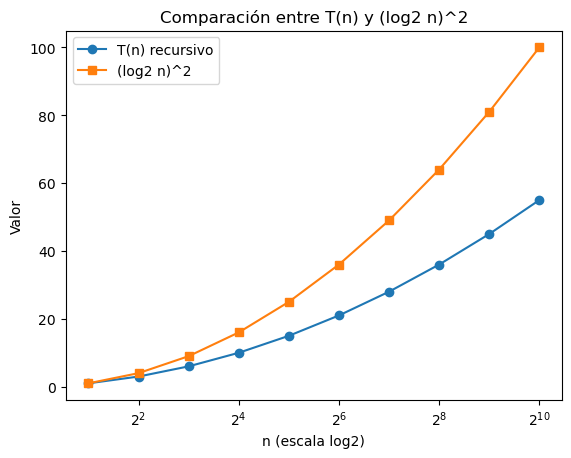

In [3]:
import matplotlib.pyplot as plt

ns = [2**k for k in range(1, 11)]  # n = 2,4,...,1024
T_vals = [T_recurrencia(n) for n in ns]
log2_sq_vals = [math.log2(n)**2 for n in ns]

plt.figure()
plt.plot(ns, T_vals, marker='o', label='T(n) recursivo')
plt.plot(ns, log2_sq_vals, marker='s', label='(log2 n)^2')
plt.xscale('log', base=2)
plt.xlabel('n (escala log2)')
plt.ylabel('Valor')
plt.title('Comparación entre T(n) y (log2 n)^2')
plt.legend()
plt.show()

En la gráfica se aprecia que ambas curvas crecen de forma muy similar, confirmando que:

$$
T(n) = \Theta\big((\log n)^2\big).
$$
